In [13]:
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as ss

In [14]:
data = pf.getdata('hubble_original_data.fits',1) 

In [15]:
x = data['distance']
y = data['velocity']

In [16]:
from kapteyn import kmpfit

In [17]:
def linear_model(p, x):      
    a =  p            
    return a*x

In [18]:
def residual(p, data):
    x, y   = data
    return (y-linear_model(p,x))

In [35]:
boostrap_time = 400 
hubble_c = [] 
for i in range(boostrap_time):
    random_index = np.random.randint(0,len(x),len(x))
    x_m = x[random_index]
    y_m = y[random_index]
    fitobj = kmpfit.Fitter(residuals=residual, data=(x_m,y_m))
    paramsinitial = [75]
    fitobj.fit(params0=paramsinitial)
    hubble_c.append(fitobj.params[0])

Text(0.5, 0, 'Hubble Constant = 422.72+-')

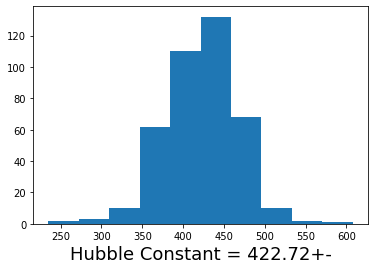

In [41]:
plt.hist(hubble_c,bins=10)
plt.xlabel("Hubble Constant ",fontsize=18)

In [42]:
print("Hubble Constant = 422.72+-",np.std(hubble_c))

Hubble Constant = 422.72+- 43.415839063337536
